### World_Science_Technology_(PCA / K-Means / AgglomerativeClustering)

Engin Abdan
(Data Scientist)

### Import

In [1562]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyclustertend import hopkins
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

sns.set_style("white")

### Data Scraping Oecd

In [1563]:
import pandas as pd
import pandasdmx as sdmx
import pandas_datareader.data as web

pd.set_option('display.max_rows', None)#print everything rows
pd.set_option('display.max_columns', None)#print everything columns

series = 'STIO_2016'
source = 'oecd'
start = '2006-01-01'
end = '2016-01-01'

oecd = sdmx.Request('OECD')
params = dict(startPeriod=start, endPeriod=end)
data_msg = oecd.data('STIO_2016', key='all', params=params)
data = data_msg.data[0]
df = sdmx.to_pandas(data).unstack() #turn data into a dataframe
print(df)

In [1564]:
#df.to_csv("science_technology.csv")

### Data Info

In [1565]:
df = pd.read_csv("science_technology.csv")
df.head()

,COUNTRY,INDICATOR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ARG,ADTERPOP_XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,BE_AF_NC,9.80,9.90,11.80,12.10,16.50,23.39,27.41,32.94,NaN,NaN
2,ARG,BE_AF_PPP,7.29,6.42,6.44,6.05,7.11,8.78,8.87,9.15,NaN,NaN
3,ARG,BE_AF_PPPK,7.76,6.66,6.55,6.11,7.11,8.55,8.45,8.48,NaN,NaN
4,ARG,BE_AF_XGDP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN


In [1566]:
df.shape

(17516, 12)

In [1567]:
df=pd.melt(df,
           id_vars=["COUNTRY","INDICATOR"],
           value_vars=["2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"],
           var_name="TIME",
           value_name="VALUE")
df.head(2)

,COUNTRY,INDICATOR,TIME,VALUE
0,ARG,ADTERPOP_XT,2006,NaN
1,ARG,BE_AF_NC,2006,9.8


In [1568]:
df.shape

(175160, 4)

In [1569]:
df = df.pivot(index=["COUNTRY","TIME"], columns="INDICATOR", values=["VALUE"])
df.columns = df.columns.droplevel()
df = df.rename_axis(None, axis=1)
df = df.reset_index()
df.head(1)

,COUNTRY,TIME,ABS_I,ADTERPOP_XT,AFA_XBE,AGEPOP_MEDIAN,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,...,WUGTARP_SCI_NB,WUGTARP_XT,WUGTA_ENG_NB,WUGTA_NB,WUGTA_SCI_NB,WUGTA_XT,WUNIVG_TERABARP_NB,WUNIVG_TERABARP_XT,XBR_I,YDEP_X1564
0,ARG,2006,NaN,NaN,NaN,NaN,9.8,7.29,7.76,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1570]:
df.shape

(510, 499)

In [1571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Columns: 499 entries, COUNTRY to YDEP_X1564
dtypes: float64(497), object(2)
memory usage: 1.9+ MB


In [1572]:
df.describe()

,ABS_I,ADTERPOP_XT,AFA_XBE,AGEPOP_MEDIAN,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,...,WUGTARP_SCI_NB,WUGTARP_XT,WUGTA_ENG_NB,WUGTA_NB,WUGTA_SCI_NB,WUGTA_XT,WUNIVG_TERABARP_NB,WUNIVG_TERABARP_XT,XBR_I,YDEP_X1564
count,80.000000,296.000000,148.000000,2.000000,283.000000,289.000000,283.000000,259.000000,2.050000e+02,218.000000,...,259.000000,135.000000,5.000000,11.000000,5.0000,6.000000,6.000000,6.000000,80.000000,457.000000
mean,2.119250,25.004831,33.942973,36.755000,8523.961943,1424.973737,1130.361025,0.121081,3.661786e+05,3776.514587,...,9230.308456,31.070148,1985.200000,139403.454545,3212.6000,59.808333,278841.166667,54.903333,0.534875,28.089453
std,0.787815,10.628215,16.499657,1.746554,23831.856300,3026.114870,2280.036939,0.246690,1.316399e+06,6301.574545,...,16424.962694,7.764802,1362.329329,94301.779364,3435.2389,1.048283,28301.040217,2.957713,0.688796,8.003298
min,0.840000,4.170000,2.540000,35.520000,4.520000,0.040000,0.050000,0.000000,7.980000e+00,14.420000,...,0.000000,15.460000,920.000000,21236.000000,1229.0000,58.460000,237823.000000,49.150000,0.010000,19.050000
25%,1.530000,17.282500,24.157500,36.137500,160.830000,77.050000,71.980000,0.020000,4.448000e+02,338.040000,...,1424.000000,25.775000,1301.000000,28285.000000,1589.0000,59.055000,258825.250000,54.977500,0.117500,21.850000
50%,2.085000,24.945000,31.610000,36.755000,1223.900000,362.600000,349.370000,0.060000,3.302370e+03,767.645000,...,2606.000000,31.430000,1451.000000,194194.000000,1600.0000,59.770000,286694.500000,55.690000,0.200000,25.730000
75%,2.465000,32.365000,41.760000,37.372500,3952.550000,1388.330000,1341.680000,0.130000,8.786380e+03,3995.427500,...,13327.500000,36.110000,1917.000000,212890.500000,2329.0000,60.755000,302463.250000,56.725000,0.505000,30.560000
max,4.750000,61.930000,72.370000,37.990000,282719.000000,19347.000000,18314.240000,1.790000,8.479291e+06,34021.440000,...,108537.000000,52.780000,4337.000000,242980.000000,9316.0000,60.950000,304580.000000,57.080000,2.900000,50.260000


In [1573]:
df.duplicated().any()

False

In [1574]:
df.isna().any()

COUNTRY               False
TIME                  False
ABS_I                  True
ADTERPOP_XT            True
AFA_XBE                True
                      ...  
WUGTA_XT               True
WUNIVG_TERABARP_NB     True
WUNIVG_TERABARP_XT     True
XBR_I                  True
YDEP_X1564             True
Length: 499, dtype: bool

In [1575]:
# Find the over %?-NAN-Value-Features and Drop them >>> (I get %70)
drop_list = []
remain_list = []

for i in df.columns[2:]:
    a = list(df[i].isna().value_counts())[0]
    b = len(df[i])
    c = (a / b) * 100
    if c > 70:
        drop_list.append(i)
    else:
        remain_list.append(i)

In [1576]:
print(len(drop_list))
print(len(remain_list))

173
324


In [1577]:
df.shape

(510, 499)

In [1578]:
df.drop(drop_list, axis=1, inplace=True)
df.shape

(510, 326)

In [1579]:
print(df.COUNTRY.nunique())
print(df.COUNTRY.unique())
# Totally 35 Countries

51
['ARG' 'AUS' 'AUT' 'BEL' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI' 'CZE'
 'DEU' 'DNK' 'EGY' 'ESP' 'EST' 'EU28' 'FIN' 'FRA' 'GBR' 'GRC' 'HUN' 'IDN'
 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MYS'
 'NLD' 'NOR' 'NZL' 'OECD' 'PER' 'POL' 'PRT' 'RUS' 'SVK' 'SVN' 'SWE' 'THA'
 'TUR' 'USA' 'ZAF']


In [1580]:
print(df.TIME.nunique())
print(df.TIME.unique())
# Totally 10 Years

10
['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015']


In [1581]:
country = pd.read_csv("iso_countries.csv")
country.head(2)

,ISO,ThreeDigitCountryCodeOE
0,AFG,AFG
1,ALB,ALB


In [1582]:
cnt_list = list(country.ISO.unique())
df_cnt = list(df.COUNTRY.unique())

In [1583]:
drp_cnt_lst = []
rmn_cnt_lst = []

for i in df_cnt:
    if i in cnt_list:
        rmn_cnt_lst.append(i)
    else:
        drp_cnt_lst.append(i)

print(drp_cnt_lst)

['EU28', 'OECD']


In [1584]:
df.shape

(510, 326)

In [1585]:
df.tail(2)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
508,ZAF,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,ZAF,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1586]:
for i in drp_cnt_lst:
    df.drop(df[df["COUNTRY"]==i].index, inplace=True)
df.shape

(490, 326)

In [1587]:
df.tail(2)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
508,ZAF,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,ZAF,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1588]:
df = df.reset_index(drop=True)
df.tail(2)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
488,ZAF,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,ZAF,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1589]:
df.isna().any().sum()

324

In [1590]:
df = df.fillna(0)
df.shape

(490, 326)

In [1591]:
df.isna().any().sum()

0

### Skewness

In [1592]:
df.head(1)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,ARG,2006,0.0,9.8,7.29,7.76,0.0,329.8,245.2,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,50.45,0.0,0.0,0.0


In [1593]:
from scipy.stats import skew

Normal = []
Moderate = []
Skewed = []

x = df.drop(columns=["COUNTRY", "TIME"]).columns
for i in x:
    y = skew(df[i], nan_policy="omit")
    if y >= -0.5 and y < 0.5:
        Normal.append(i)
        print(f"{i} \t: {y} \t>>> Normal")
    elif y >= 0.5 and y < 1.0:
        Moderate.append(i)
        print(f"{i} \t: {y} \t>>> Moderate")
    elif y >= 1.0:
        Skewed.append(i)
        print(f"{i} \t: {y} \t>>> Skewed")

print("-"*100)
print(f"Normal \t\t:{len(Normal)}")
print(f"Moderate \t:{len(Moderate)}")
print(f"Skewed \t\t:{len(Skewed)}")     

ADTERPOP_XT 	: 0.4420122060930814 	>>> Normal
BE_AF_NC 	: 8.65681371262468 	>>> Skewed
BE_AF_PPP 	: 6.187100335467118 	>>> Skewed
BE_AF_PPPK 	: 6.0658499616853625 	>>> Skewed
BE_AF_XGDP 	: 7.043336519035073 	>>> Skewed
BE_AR_NC 	: 6.807030276653341 	>>> Skewed
BE_AR_PPP 	: 3.999953977827496 	>>> Skewed
BE_AR_XGDP 	: 2.1837133863269176 	>>> Skewed
BE_BEF_NC 	: 6.856624117805785 	>>> Skewed
BE_BEF_PPP 	: 4.527218153095782 	>>> Skewed
BE_BEF_PPPK 	: 4.488169732634527 	>>> Skewed
BE_BEF_XBE 	: -0.18866521485544968 	>>> Normal
BE_BEF_XG 	: 0.175081132950095 	>>> Normal
BE_BEF_XGDP 	: 1.521110733954084 	>>> Skewed
BE_DGVF_NC 	: 7.65748848055015 	>>> Skewed
BE_DGVF_PPP 	: 6.00699100246161 	>>> Skewed
BE_DGVF_PPPK 	: 6.0095150292852955 	>>> Skewed
BE_DGVF_XBE 	: 4.138873675518815 	>>> Skewed
BE_DGVF_XG 	: 4.474533093029735 	>>> Skewed
BE_DGVF_XGDP 	: 2.657873315463451 	>>> Skewed
BE_ED_NC 	: 6.785474521365984 	>>> Skewed
BE_ED_PPP 	: 6.586411577262644 	>>> Skewed
BE_ED_XGDP 	: 2.59607564865540

In [1594]:
Normal = []
Right = []
Left = []

x = df.drop(columns=["COUNTRY", "TIME"]).columns
for i in x:
    a = df[i].mean()
    b = df[i].median()
    if a == b:
        Normal.append(i)
        print(f"{i} \t: Normal Skewed")
    elif a > b:
        Right.append(i)
        print(f"{i} \t: Right Skewed")
    elif a < b:
        Left.append(i)
        print(f"{i} \t: Left Skewed")

print("-"*100)
print(f"Normal \t:{len(Normal)}")
print(f"Right \t:{len(Right)}")
print(f"Left \t:{len(Left)}")     

ADTERPOP_XT 	: Right Skewed
BE_AF_NC 	: Right Skewed
BE_AF_PPP 	: Right Skewed
BE_AF_PPPK 	: Right Skewed
BE_AF_XGDP 	: Right Skewed
BE_AR_NC 	: Right Skewed
BE_AR_PPP 	: Right Skewed
BE_AR_XGDP 	: Right Skewed
BE_BEF_NC 	: Right Skewed
BE_BEF_PPP 	: Right Skewed
BE_BEF_PPPK 	: Right Skewed
BE_BEF_XBE 	: Left Skewed
BE_BEF_XG 	: Left Skewed
BE_BEF_XGDP 	: Right Skewed
BE_DGVF_NC 	: Right Skewed
BE_DGVF_PPP 	: Right Skewed
BE_DGVF_PPPK 	: Right Skewed
BE_DGVF_XBE 	: Right Skewed
BE_DGVF_XG 	: Right Skewed
BE_DGVF_XGDP 	: Right Skewed
BE_ED_NC 	: Right Skewed
BE_ED_PPP 	: Right Skewed
BE_ED_XGDP 	: Right Skewed
BE_GRO 	: Right Skewed
BE_HEF_NC 	: Right Skewed
BE_HEF_PPP 	: Right Skewed
BE_HEF_PPPK 	: Right Skewed
BE_LGE_XBE 	: Right Skewed
BE_ONF_NC 	: Right Skewed
BE_ONF_PPP 	: Right Skewed
BE_ONF_PPPK 	: Right Skewed
BE_PNPF_NC 	: Right Skewed
BE_PNPF_PPP 	: Right Skewed
BE_PNPF_PPPK 	: Right Skewed
BE_PNPF_XGDP 	: Right Skewed
BE_SME_XBE 	: Right Skewed
BE_XBE 	: Right Skewed
EGOV_I 	

### Train Test Split

In [1595]:
X = df.drop(["COUNTRY", "TIME"], axis=1)
X.head(1)

,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,BE_BEF_NC,BE_BEF_PPP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,0.0,9.8,7.29,7.76,0.0,329.8,245.2,0.04,930.3,691.67,...,0.0,0.0,0.0,0.0,0.0,0.0,50.45,0.0,0.0,0.0


### Scaling

In [1596]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_X_scaled.head()

,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,BE_BEF_NC,BE_BEF_PPP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,-1.024111,-0.264675,-0.350510,-0.354913,-0.338744,-0.176037,-0.312333,-0.369615,-0.177298,-0.301801,...,-0.858642,-0.787892,-0.308145,-0.339822,-0.306683,-0.294329,1.692184,-0.480026,-0.355176,-0.381819
1,-1.024111,-0.264670,-0.350977,-0.355519,-0.338744,-0.175934,-0.306460,-0.369615,-0.177245,-0.299948,...,-0.858642,-0.787892,-0.308145,-0.339822,-0.306683,-0.294329,1.748558,-0.480026,-0.355176,-0.381819
2,-1.024111,-0.264568,-0.350966,-0.355579,-0.338744,-0.175844,-0.306628,-0.369615,-0.177199,-0.299978,...,-0.858642,-0.787892,-0.308145,-0.339822,-0.306683,-0.294329,1.735262,-0.480026,-0.355176,-0.381819
3,-1.024111,-0.264551,-0.351176,-0.355821,-0.338744,-0.175832,-0.310335,-0.369615,-0.177192,-0.301146,...,-0.858642,-0.787892,-0.308145,-0.339822,-0.306683,-0.294329,1.769831,-0.480026,-0.355176,-0.381819
4,-1.024111,-0.264314,-0.350607,-0.355271,-0.338744,-0.175620,-0.300742,-0.369615,-0.177084,-0.298117,...,-0.858642,-0.787892,-0.308145,-0.339822,-0.306683,-0.294329,1.786318,-0.171682,-0.144974,-0.152831


### PCA Model & Best Number of Component

In [1597]:
X.columns.value_counts().sum()

324

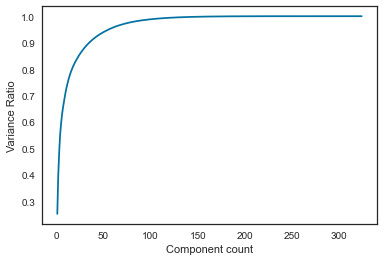

In [1598]:
from sklearn.decomposition import PCA

model = PCA().fit(X_scaled)
x = range(1,325)

plt.plot(x, np.cumsum(model.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [1599]:
model = PCA(n_components=324).fit(X_scaled)

In [1600]:
my_dict = {"explained_variance":model.explained_variance_, 
           "explained_variance_ratio":model.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":model.explained_variance_ratio_.cumsum()}

In [1601]:
df_best = pd.DataFrame(my_dict, index = range(1,325))
df_best = df_best.sort_values(by="explained_variance_ratio")
df_best = df_best.iloc[:50,:]
df_best.shape

(50, 3)

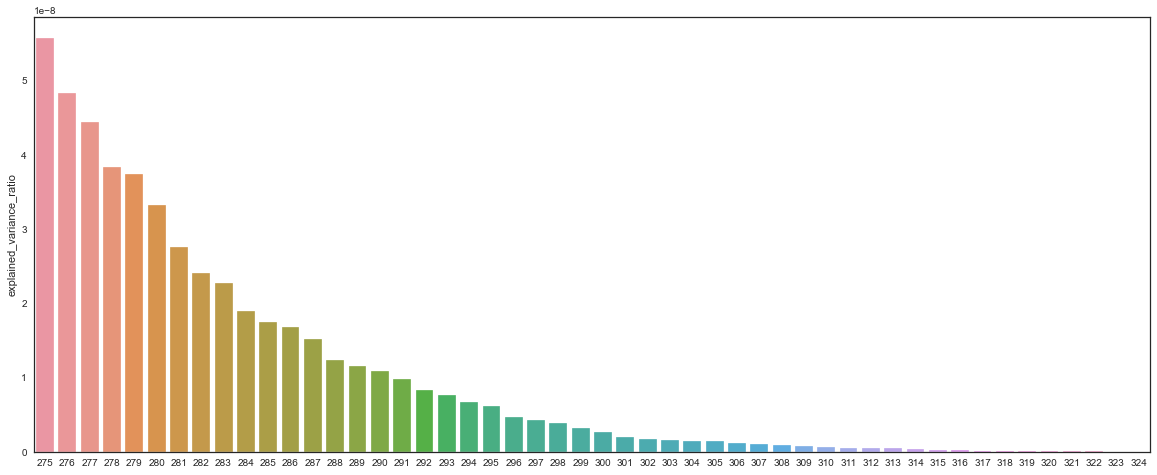

In [1602]:
plt.figure(figsize=(20,8))
sns.barplot(df_best.index, df_best.explained_variance_ratio);

In [1603]:
# Decide to create 7 components

### PCA Model & Component=7

In [1604]:
model = PCA(n_components=7)

comp_df = pd.DataFrame(data = model.fit_transform(X_scaled),
                       columns = ["1_Comp","2_Comp","3_Comp","4_Comp","5_Comp","6_Comp","7_Comp"])
comp_df

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966
1,-2.952898,0.222956,-0.004622,-0.216618,-0.908643,1.495421,0.851361
2,-2.743541,0.233172,-0.336567,-0.284682,-0.772409,1.320002,0.676204
3,-2.400939,0.187613,-0.666919,-0.181724,-0.834403,1.485842,0.499866
4,-2.586658,0.089136,0.195643,-0.337650,-0.432370,1.406525,-0.125768
...,...,...,...,...,...,...,...
485,-3.741699,-0.175448,2.344390,1.546929,-1.780955,0.537566,2.205619
486,-3.634776,-0.177917,2.170340,1.584288,-1.750691,0.626551,3.271882
487,-6.521583,0.235962,6.455699,-0.427975,0.219432,0.343086,0.007502
488,-6.517179,0.345492,6.222460,-0.324890,0.170317,0.432632,-0.131001


### Eigenvalues & Eigenvectors

In [1605]:
model.components_

array([[ 0.01875081,  0.06461834,  0.06507408, ...,  0.0580392 ,
         0.06008945,  0.06945873],
       [-0.02426863,  0.08491237, -0.07751061, ..., -0.01755034,
        -0.05465661, -0.06792635],
       [-0.06551269,  0.02797125,  0.00075269, ...,  0.00915901,
         0.03311345,  0.01680785],
       ...,
       [-0.0162375 ,  0.00703825, -0.02729188, ..., -0.030617  ,
        -0.05573331, -0.06702693],
       [-0.05758185, -0.00273565, -0.06424458, ...,  0.01220827,
         0.01354293, -0.00191307],
       [-0.01994106,  0.01419734,  0.07236428, ...,  0.00628413,
        -0.0266355 , -0.01681361]])

In [1606]:
len(model.components_)

7

In [1607]:
# for i in range(0,7):
#     x = f"eigv_comp_{i+1}"
#     z = f"{i+1}_eigv"
#     x = pd.DataFrame(model.components_[i],
#                      index=X.columns,
#                      columns=[z]).sort_values(z, ascending=False)
#     print(f"eigv_comp_{i+1}_1st_row \t: {x.iloc[0,0]}")

In [1608]:
eigv_comp_1 = model.components_[0]
eigv_comp_1

array([ 0.01875081,  0.06461834,  0.06507408,  0.06540128,  0.00830566,
        0.0655253 ,  0.06063123,  0.04933473,  0.06553222,  0.08625528,
        0.08672443,  0.05853944,  0.07126054,  0.07277798,  0.05595191,
        0.07331064,  0.07304843,  0.02171368,  0.02627185,  0.0511541 ,
        0.0652972 ,  0.04539517,  0.06446151,  0.0118036 ,  0.05553171,
        0.04905228,  0.04827094,  0.0473158 ,  0.06827583,  0.0135743 ,
        0.01272865,  0.06611176,  0.06866299,  0.06857404,  0.00633557,
        0.01476583,  0.06575472,  0.01048755,  0.04742126,  0.04656586,
        0.04244517, -0.02872434, -0.0302934 ,  0.05558917,  0.03940038,
        0.00426282,  0.01402674,  0.0363972 ,  0.02165786,  0.00935935,
        0.00865663,  0.05839291,  0.08967342,  0.08636978,  0.00523429,
        0.01262856,  0.06310997,  0.05053963,  0.06247673,  0.02282124,
        0.03725873,  0.05775   ,  0.06538646,  0.02958425,  0.07356647,
        0.0744361 ,  0.06186921,  0.08172326,  0.07804829,  0.01

In [1609]:
pd.DataFrame(eigv_comp_1,
             index=X.columns,
             columns=["1_eigv"]).sort_values("1_eigv", ascending=False)

,1_eigv
HE_GVF_PPP,0.089977
HE_GVF_PPPK,0.089953
GB_AGR_PPP,0.089673
PUB_PUBF_PPP,0.088905
PNP_BEF_PPP,0.088214
...,...
GV_HEF_XGDP,-0.001896
PNP_AF_XG,-0.002560
G_HEF_XG,-0.004825
EMPVF_XEMF,-0.028724


In [1610]:
df_X_scaled.loc[0]

ADTERPOP_XT      -1.024111
BE_AF_NC         -0.264675
BE_AF_PPP        -0.350510
BE_AF_PPPK       -0.354913
BE_AF_XGDP       -0.338744
                    ...   
WPHD_SCI_NB      -0.294329
WRSE_XRSE         1.692184
WUGTARP_ENG_NB   -0.480026
WUGTARP_NB       -0.355176
WUGTARP_SCI_NB   -0.381819
Name: 0, Length: 324, dtype: float64

In [1611]:
(df_X_scaled.loc[0] * eigv_comp_1).sum()

-3.0248917729358373

In [1612]:
comp_df.head()

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966
1,-2.952898,0.222956,-0.004622,-0.216618,-0.908643,1.495421,0.851361
2,-2.743541,0.233172,-0.336567,-0.284682,-0.772409,1.320002,0.676204
3,-2.400939,0.187613,-0.666919,-0.181724,-0.834403,1.485842,0.499866
4,-2.586658,0.089136,0.195643,-0.337650,-0.432370,1.406525,-0.125768


In [1613]:
# Eigenvalues : The more containing info about data, the more Eigenvalues
model.explained_variance_

array([82.16324905, 46.58115326, 28.95570344, 21.61763198, 13.39072198,
       11.04689764,  8.35423912])

### Correlation Between Components

In [1614]:
comp_df.corr().round()

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
1_Comp,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
2_Comp,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0
3_Comp,0.0,0.0,1.0,0.0,0.0,0.0,-0.0
4_Comp,-0.0,0.0,0.0,1.0,0.0,0.0,-0.0
5_Comp,-0.0,0.0,0.0,0.0,1.0,0.0,0.0
6_Comp,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0
7_Comp,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0


### K-Means Model

### Hopkins

In [1615]:
from pyclustertend import hopkins
hopkins(comp_df, len(comp_df))

0.04248725031826379

### Elbow & "k"

In [1616]:
from sklearn.cluster import KMeans
ssd = []
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(comp_df)
    ssd.append(model.inertia_)

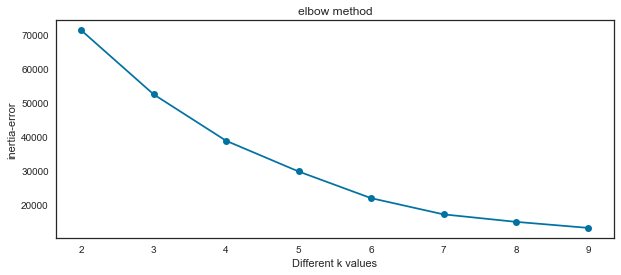

In [1617]:
plt.figure(figsize=(10,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [1618]:
# Best "k"=3 due to Elbow

### Yellowbrick & "k"

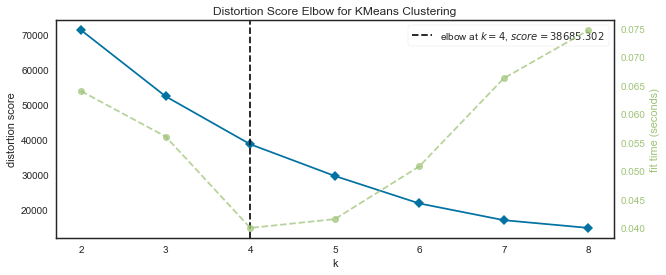

In [1619]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,4))
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(comp_df)    
visualizer.show();

In [1620]:
# Best "k"=4 due to Elbow

### Silhouette & "k"

In [1621]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(comp_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(comp_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7366052794658696
For n_clusters=3, the silhouette score is 0.7378512295918466
For n_clusters=4, the silhouette score is 0.3944804251983952
For n_clusters=5, the silhouette score is 0.4149407667742459
For n_clusters=6, the silhouette score is 0.4332376016517376
For n_clusters=7, the silhouette score is 0.4407871049445727
For n_clusters=8, the silhouette score is 0.3890897449121405


In [1622]:
# Best "k"=3 due to Silhouette

### K-Means Model

In [1623]:
model = KMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(comp_df)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [1624]:
comp_df.head()

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966
1,-2.952898,0.222956,-0.004622,-0.216618,-0.908643,1.495421,0.851361
2,-2.743541,0.233172,-0.336567,-0.284682,-0.772409,1.320002,0.676204
3,-2.400939,0.187613,-0.666919,-0.181724,-0.834403,1.485842,0.499866
4,-2.586658,0.089136,0.195643,-0.337650,-0.432370,1.406525,-0.125768


In [1625]:
comp_df.insert(0, "COUNTRY", df["COUNTRY"])

In [1626]:
comp_df.insert(1, "Class", labels)
comp_df.head()

,COUNTRY,Class,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,ARG,0,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966
1,ARG,0,-2.952898,0.222956,-0.004622,-0.216618,-0.908643,1.495421,0.851361
2,ARG,0,-2.743541,0.233172,-0.336567,-0.284682,-0.772409,1.320002,0.676204
3,ARG,0,-2.400939,0.187613,-0.666919,-0.181724,-0.834403,1.485842,0.499866
4,ARG,0,-2.586658,0.089136,0.195643,-0.337650,-0.432370,1.406525,-0.125768


In [1627]:
comp_df.Class.unique()

array([0, 1, 2])

### Visualization Clusters

In [1628]:
comp_df[comp_df["Class"]==0].COUNTRY.unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MYS', 'NLD',
       'NOR', 'NZL', 'PER', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE',
       'THA', 'TUR', 'USA', 'ZAF'], dtype=object)

In [1629]:
comp_df[comp_df["Class"]==1].COUNTRY.unique()

array(['JPN', 'KOR'], dtype=object)

In [1630]:
comp_df[comp_df["Class"]==2].COUNTRY.unique()

array(['USA'], dtype=object)

In [1631]:
comp_df[(comp_df["COUNTRY"]=="USA") & (comp_df["Class"]==0)] = comp_df[(comp_df["COUNTRY"]=="USA") & (comp_df["Class"]==0)].replace(0, 2)

comp_df[(comp_df["COUNTRY"]=="JPN") & (comp_df["Class"]==0)] = comp_df[(comp_df["COUNTRY"]=="JPN") & (comp_df["Class"]==0)].replace(0, 1)
comp_df[(comp_df["COUNTRY"]=="KOR") & (comp_df["Class"]==0)] = comp_df[(comp_df["COUNTRY"]=="KOR") & (comp_df["Class"]==0)].replace(0, 1)

In [1632]:
comp_df[comp_df["Class"]==0].COUNTRY.unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'LTU', 'LUX', 'LVA', 'MEX', 'MYS', 'NLD', 'NOR', 'NZL',
       'PER', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'THA', 'TUR',
       'ZAF'], dtype=object)

In [1633]:
comp_df[comp_df["Class"]==1].COUNTRY.unique()

array(['JPN', 'KOR'], dtype=object)

In [1634]:
comp_df[comp_df["Class"]==2].COUNTRY.unique()

array(['USA'], dtype=object)

In [1635]:
comp_df.head(1)

,COUNTRY,Class,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,ARG,0,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966


In [1636]:
comp_df = comp_df.set_index("COUNTRY")
comp_df = comp_df.drop(["Class"], axis=1)
comp_df.head()

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
COUNTRY,,,,,,,
ARG,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966
ARG,-2.952898,0.222956,-0.004622,-0.216618,-0.908643,1.495421,0.851361
ARG,-2.743541,0.233172,-0.336567,-0.284682,-0.772409,1.320002,0.676204
ARG,-2.400939,0.187613,-0.666919,-0.181724,-0.834403,1.485842,0.499866
ARG,-2.586658,0.089136,0.195643,-0.337650,-0.432370,1.406525,-0.125768


In [1637]:
comp_df.shape

(490, 7)

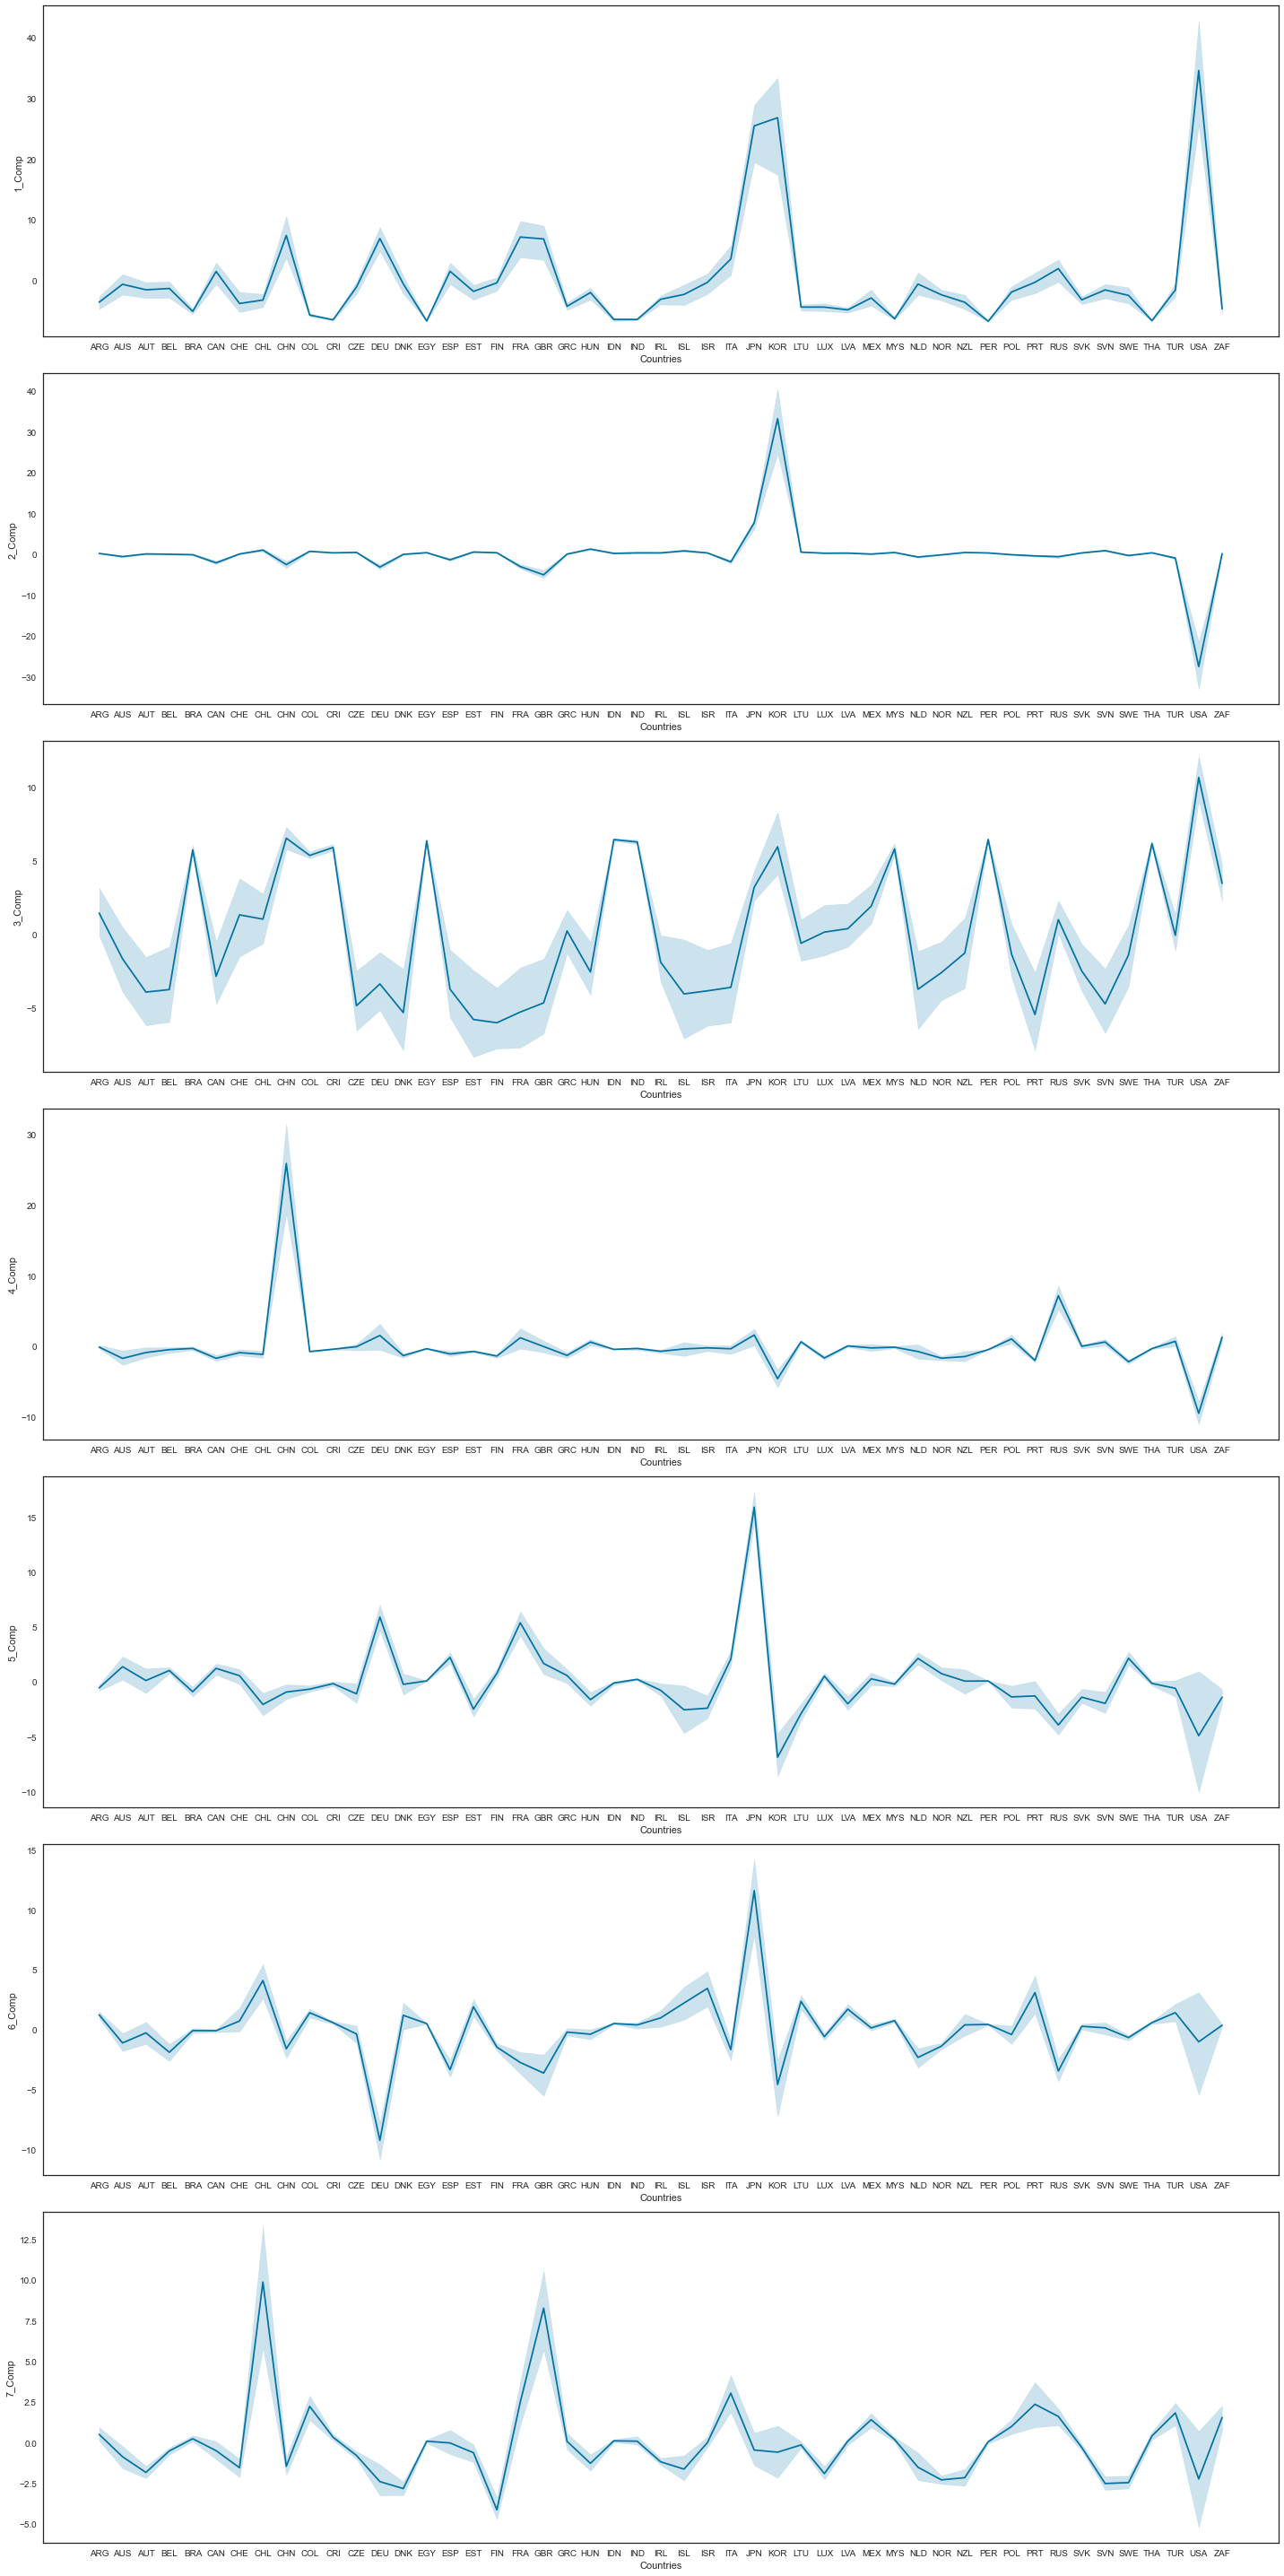

In [1638]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(20,40), sharey=False, sharex=False)

for i in range(7):       
    sns.lineplot(data=comp_df.iloc[:,i], ax=ax[i], palette="muted")
    ax[i].set_xlabel("Countries")
    ax[i].set_ylabel(comp_df.columns[i])

plt.tight_layout();

### Composition Selection

In [1639]:
comp_df.head(1)

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
COUNTRY,,,,,,,
ARG,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966


In [1640]:
comp_df = comp_df.reset_index()

In [1641]:
comp_df.head(1)

,COUNTRY,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp
0,ARG,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966


In [1642]:
comp_df.insert(8, "Class", labels)
comp_df.head()

,COUNTRY,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp,Class
0,ARG,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966,0
1,ARG,-2.952898,0.222956,-0.004622,-0.216618,-0.908643,1.495421,0.851361,0
2,ARG,-2.743541,0.233172,-0.336567,-0.284682,-0.772409,1.320002,0.676204,0
3,ARG,-2.400939,0.187613,-0.666919,-0.181724,-0.834403,1.485842,0.499866,0
4,ARG,-2.586658,0.089136,0.195643,-0.337650,-0.432370,1.406525,-0.125768,0


In [1643]:
comp_df.head(1)

,COUNTRY,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp,Class
0,ARG,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966,0


In [1644]:
comp_df[(comp_df["COUNTRY"]=="USA") & (comp_df["Class"]==0)] = comp_df[(comp_df["COUNTRY"]=="USA") & (comp_df["Class"]==0)].replace(0, 2)

comp_df[(comp_df["COUNTRY"]=="JPN") & (comp_df["Class"]==0)] = comp_df[(comp_df["COUNTRY"]=="JPN") & (comp_df["Class"]==0)].replace(0, 1)
comp_df[(comp_df["COUNTRY"]=="KOR") & (comp_df["Class"]==0)] = comp_df[(comp_df["COUNTRY"]=="KOR") & (comp_df["Class"]==0)].replace(0, 1)

In [1645]:
comp_df[comp_df["Class"]==0].COUNTRY.unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'LTU', 'LUX', 'LVA', 'MEX', 'MYS', 'NLD', 'NOR', 'NZL',
       'PER', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'THA', 'TUR',
       'ZAF'], dtype=object)

In [1646]:
comp_df[comp_df["Class"]==1].COUNTRY.unique()

array(['JPN', 'KOR'], dtype=object)

In [1647]:
comp_df[comp_df["Class"]==2].COUNTRY.unique()

array(['USA'], dtype=object)

In [1648]:
comp_df.drop(columns="COUNTRY", axis=1, inplace=True)

In [1649]:
comp_df.head(1)

,1_Comp,2_Comp,3_Comp,4_Comp,5_Comp,6_Comp,7_Comp,Class
0,-3.024892,0.136256,0.090472,-0.250536,-1.070321,1.836201,1.258966,0


In [1650]:
comp_df = comp_df.groupby("Class").mean().T

In [1651]:
comp_df

Class,0,1,2
1_Comp,-1.888435,26.137364,34.593262
2_Comp,-0.288187,20.416547,-27.576477
3_Comp,-0.429832,4.560899,10.650484
4_Comp,0.271914,-1.502153,-9.503747
5_Comp,-0.090402,4.524430,-4.890358
6_Comp,-0.130517,3.510948,-1.018125
7_Comp,0.070777,-0.515587,-2.224576


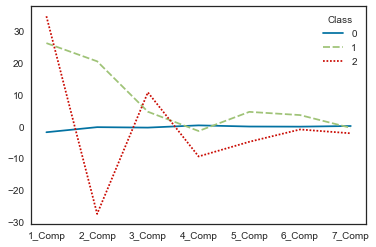

In [1652]:
sns.lineplot(data=comp_df);

In [1653]:
# We may take the Compositions (1, 2, 3, 4) 
# Than create a ne Dataset
# K-Means Clustering
# Hopkins
# Elbow
# Yellowbrick
# Silhouette
# Best "k"
# Rethink the Class of Countries  

### Prediction

In [1654]:
df.head(1)

,COUNTRY,TIME,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,ARG,2006,0.0,9.8,7.29,7.76,0.0,329.8,245.2,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,50.45,0.0,0.0,0.0


In [1655]:
df.drop(columns=["COUNTRY","TIME"], axis=1, inplace=True)

In [1656]:
df.head(1)

,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,BE_BEF_NC,BE_BEF_PPP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,0.0,9.8,7.29,7.76,0.0,329.8,245.2,0.04,930.3,691.67,...,0.0,0.0,0.0,0.0,0.0,0.0,50.45,0.0,0.0,0.0


In [1657]:
pred = [list(df.mean()), list(df.median()), list((df.mean()*df.median())/(df.mean()+df.median()))]
pred_data = pd.DataFrame(data=pred, columns=df.columns)
pred_data

,ADTERPOP_XT,BE_AF_NC,BE_AF_PPP,BE_AF_PPPK,BE_AF_XGDP,BE_AR_NC,BE_AR_PPP,BE_AR_XGDP,BE_BEF_NC,BE_BEF_PPP,...,UNI500_HAB,WBBAND_HAB,WBBAND_NB,WPHD_ENG_NB,WPHD_NB,WPHD_SCI_NB,WRSE_XRSE,WUGTARP_ENG_NB,WUGTARP_NB,WUGTARP_SCI_NB
0,15.104959,4923.022918,660.158061,652.841163,0.064,153197.152735,1680.163633,0.117592,850396.565082,13090.333776,...,310.164000,28.38202,1.123361e+07,88.261224,1085.273469,248.510204,18.631673,3593.061041,87639.192714,4878.877327
1,13.935000,36.265000,27.780000,29.670000,0.000,0.000000,0.000000,0.000000,932.290000,553.935000,...,153.390000,0.00000,2.665000e+02,0.000000,0.000000,0.000000,16.235000,0.000000,342.500000,0.000000
2,7.248206,35.999811,26.658201,28.380191,0.000,0.000000,0.000000,0.000000,931.269049,531.446145,...,102.633255,0.00000,2.664937e+02,0.000000,0.000000,0.000000,8.675483,0.000000,341.166697,0.000000


In [1658]:
from sklearn.cluster import AgglomerativeClustering
model_last_AGGL = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")

In [1659]:
model_last_AGGL.fit_predict(pred_data)

array([1, 2, 0], dtype=int64)

In [1660]:
from sklearn.cluster import KMeans
model_last_KMNS = KMeans(n_clusters=3, random_state=42)

In [1661]:
model_last_KMNS.fit_predict(pred_data)

array([1, 2, 0])